In [1]:
import pandas as pd
import nltk 

In [2]:
# thực hiện tiếp các nhiệm vụ sau:
# 
#  lựa chọn đặc trưng 1-gram, 2-gram
# convert sang vector với trọng số ở các mode: binary, count, tfidf 
# chia thành tập Train và Test 
# xây dựng các mô hình học: NB, SVM, Neural Network 
# chọn mô hình tốt nhất và viết hàm dự đoán sentiment của một câu đưa vào

In [3]:
df = pd.read_csv('sentimentVN.csv')
print(df.head(10))

   Unnamed: 0                                            comment label
0           0                              áo bao đẹp ạ positive   POS
1           1                                 tuyệt vời positive   POS
2           2                          2day ao không giong trong   NEG
3           3       mùi thơm bôi lên da mềm da nagative positive   POS
4           4                           vải đẹp dày dặn positive   POS
5           5    hàng rất đẹp rất chi là ưng ý positive positive   POS
6           6  chất lượng sản phẩm tốt hạn sử dụng dài positi...   POS
7           7             ăn nói và thái độ phục vụ tốt positive   POS
8           8               đóng gói sản phẩm chắc chắn positive   POS
9           9                  tất sờn hết ca chưa dùng mà vay r   NEG


In [4]:
df.shape

(31460, 3)

In [7]:
df.dtypes

Unnamed: 0     int64
comment       object
label         object
dtype: object

In [5]:
df.notnull()

Unnamed: 0  comment  label
0            True     True   True
1            True     True   True
2            True     True   True
3            True     True   True
4            True     True   True
...           ...      ...    ...
31455        True     True   True
31456        True     True   True
31457        True     True   True
31458        True     True   True
31459        True     True   True

[31460 rows x 3 columns]

In [6]:
df.isnull().sum() 

Unnamed: 0     0
comment       25
label          0
dtype: int64

# Tìm ra các hàng có giá trị null 

In [7]:
df[df.isnull().any(axis=1)]

Unnamed: 0 comment label
1462         1462     NaN   POS
1931         1931     NaN   NEG
3730         3730     NaN   NEU
8194         8194     NaN   NEG
8355         8355     NaN   POS
10181       10181     NaN   POS
17982       17982     NaN   POS
20142       20142     NaN   NEU
22059       22059     NaN   POS
23510       23510     NaN   NEU
24343       24343     NaN   NEU
25543       25543     NaN   POS
25703       25703     NaN   POS
27954       27954     NaN   NEG
28009       28009     NaN   POS
28402       28402     NaN   NEG
28741       28741     NaN   NEU
29145       29145     NaN   POS
29231       29231     NaN   POS
29509       29509     NaN   POS
30010       30010     NaN   POS
30154       30154     NaN   POS
30907       30907     NaN   POS
30992       30992     NaN   NEG
31447       31447     NaN   POS

# Đưa cột comment về dạng string vì có 25 cột null

In [8]:
df['comment']=df['comment'].apply(str)

# Kiểm tra lại dữ liệu

In [9]:
df.isnull().sum()

Unnamed: 0    0
comment       0
label         0
dtype: int64

# Lấy dữ liệu để chuẩn bị train

In [10]:
from collections import Counter
counter = Counter()
labels = df.values[:,2]
reviews = df.values[:,1]
counter.update(labels)
print(counter)
print(reviews[0:15])
print(labels[0:15])

Counter({'POS': 20093, 'NEG': 6669, 'NEU': 4698})
['áo bao đẹp ạ positive' 'tuyệt vời positive' '2day ao không giong trong'
 'mùi thơm bôi lên da mềm da nagative positive' 'vải đẹp dày dặn positive'
 'hàng rất đẹp rất chi là ưng ý positive positive'
 'chất lượng sản phẩm tốt hạn sử dụng dài positive positive'
 'ăn nói và thái độ phục vụ tốt positive'
 'đóng gói sản phẩm chắc chắn positive'
 'tất sờn hết ca chưa dùng mà vay r' 'cửa hàng phục vụ rất tốt positive'
 'mặc thì cũng được positive' 'chất vải khỏi chê'
 'thời gian giao hàng rất nhanh'
 'chất lượng sản phẩm tuyệt vời positive positive']
['POS' 'POS' 'NEG' 'POS' 'POS' 'POS' 'POS' 'POS' 'POS' 'NEG' 'POS' 'NEU'
 'POS' 'POS' 'POS']


In [11]:
sentences = [nltk.word_tokenize(sent) for sent in reviews]
print(sentences[0:5])

[['áo', 'bao', 'đẹp', 'ạ', 'positive'], ['tuyệt', 'vời', 'positive'], ['2day', 'ao', 'không', 'giong', 'trong'], ['mùi', 'thơm', 'bôi', 'lên', 'da', 'mềm', 'da', 'nagative', 'positive'], ['vải', 'đẹp', 'dày', 'dặn', 'positive']]


In [12]:
from nltk import ngrams
for sent in reviews:
    words = nltk.word_tokenize(sent)
    gram2=ngrams(words,2)
    join_grams = ['_'.join(list(gram)) for gram in gram2]
    print(join_grams)

['áo_bao', 'bao_đẹp', 'đẹp_ạ', 'ạ_positive']
['tuyệt_vời', 'vời_positive']
['2day_ao', 'ao_không', 'không_giong', 'giong_trong']
['mùi_thơm', 'thơm_bôi', 'bôi_lên', 'lên_da', 'da_mềm', 'mềm_da', 'da_nagative', 'nagative_positive']
['vải_đẹp', 'đẹp_dày', 'dày_dặn', 'dặn_positive']
['hàng_rất', 'rất_đẹp', 'đẹp_rất', 'rất_chi', 'chi_là', 'là_ưng', 'ưng_ý', 'ý_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_hạn', 'hạn_sử', 'sử_dụng', 'dụng_dài', 'dài_positive', 'positive_positive']
['ăn_nói', 'nói_và', 'và_thái', 'thái_độ', 'độ_phục', 'phục_vụ', 'vụ_tốt', 'tốt_positive']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_chắc', 'chắc_chắn', 'chắn_positive']
['tất_sờn', 'sờn_hết', 'hết_ca', 'ca_chưa', 'chưa_dùng', 'dùng_mà', 'mà_vay', 'vay_r']
['cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_positive']
['mặc_thì', 'thì_cũng', 'cũng_được', 'được_positive']
['chất_vải', 'vải_khỏi', 'khỏi_chê']
['thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'r

['giá_rẻ', 'rẻ_len', 'len_mềm', 'mềm_và', 'và_lên', 'lên_form', 'form_đẹp', 'đẹp_lắm', 'lắm_nhé', 'nhé_positive', 'positive_positive']
['mình_39', '39_ký', 'ký_mặc', 'mặc_vừa', 'vừa_form', 'form_đẹp', 'đẹp_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_rất', 'rất_đáng', 'đáng_tiền', 'tiền_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_

['vải_notnag', 'notnag_giặc', 'giặc_ra', 'ra_màu', 'màu_cửa', 'cửa_hàng', 'hàng_notpos']
['form_hơi', 'hơi_rộng', 'rộng_nhưng', 'nhưng_chất', 'chất_lượng', 'lượng_áo', 'áo_tốt', 'tốt_cám', 'cám_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive', 'positive_positive', 'positive_positive']
['hàng_quá', 'quá_chất']
['cũng_tạm', 'tạm_chất', 'chất_không', 'không_bóng', 'bóng_như', 'như_trong', 'trong_hình']
['chất_lượng', 'lượng_được', 'được_mà', 'mà_áo', 'áo_bị', 'bị_dính', 'dính_dơ', 'dơ_ở', 'ở_trước', 'trước_1', '1_hết', 'hết_đóm', 'đóm_positive', 'positive_positive', 'positive_nagative', 'nagative_nagative']
['áo_đẹp', 'đẹp_rẻ', 'rẻ_giao', 'giao_hàng', 'hàng_nhanh', 'nhanh_nhưng', 'nhưng_dặn', 'dặn_cửa', 'cửa_hàng', 'hàng_giao', 'giao_màu', 'màu_xanh', 'xanh_ngọc', 'ngọc_mà', 'mà_cửa', 'cửa_hàng', 'hàng_giao', 'giao_màu', 'màu_xanh', 'xanh_lá', 'lá_mạ', 'mạ_làm', 'làm_nổi', 'nổi_quá', 'quá_trời', 'trời_positive']
['ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_dài']
['hàng_tốt', 'tốt_tuy', 'tuy_nhiên', '

['chất_luong', 'luong_ao', 'ao_rat', 'rat_tot', 'tot_mac', 'mac_rat', 'rat_miem', 'miem_mai', 'mai_rat', 'rat_thich', 'thich_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_chất', 'chất_đẹp', 'đẹp_lại', 'lại_còn', 'còn_kèm', 'kèm_quà', 'quà_tặng', 'tặng_positive', 'positive_positive']
['giày_tróc', 'tróc_màu', 'màu_đế', 'đế_giống', 'giống_như', 'như_đồ', 'đồ_chơi', 'chơi_con', 'con_nít', 'nít_sơn', 'sơn_chồng', 'chồng_lên', 'lên_giày', 'giày_dỏm', 'dỏm_nagative', 'nagative_nagative']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive']
['cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_cực', 'cực_kì', 'kì_kém']
['áo_y', 'y_hình']
['cám_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive']
['cảm_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive']
['cực_kì', 'kì_thất', 'thất_vọng', 'vọng_nagative']
['rất_đáng', 'đáng_tiền']
['vải_nóng', 'n

['đặt_3', '3_áo', 'áo_đen', 'đen_trắng', 'trắng_rêu', 'rêu_lại', 'lại_giao', 'giao_rêu', 'rêu_hồng', 'hồng_tím']
['váy_cửa', 'cửa_hàng', 'hàng_bán', 'bán_siêu', 'siêu_đẹp', 'đẹp_vải', 'vải_tốt', 'tốt_rất', 'rất_đáng', 'đáng_tiền', 'tiền_luôn', 'luôn_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['xấu_cả', 'cả_chất', 'chất_vải', 'vải_lẫn', 'lẫn_form', 'form_quần', 'quần_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_rất', 'rất_đáng', 'đáng_tiền', 'tiền_mk', 'mk_có', 'có_video', 'video_mà', 'mà_notpos', 'notpos_đăng', 'đăng_mùi', 'mùi_hơi', 'hơi_ghê', 'ghê_nhưng', 'nhưng_chống', 'chống_nước', 'nước_tốt', 'tốt_lắm', 'lắm_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_nagative', 'nagative_nagative', 'nagative_positive']
['ao_đẹp', 'đẹp_co', 'co_g

['cửa_hàng', 'hàng_giao', 'giao_hàng', 'hàng_nhanh', 'nhanh_đóng', 'đóng_gói', 'gói_chắc', 'chắc_chắn', 'chắn_chất', 'chất_vải', 'vải_mềm', 'mềm_đẹp', 'đẹp_cổ', 'cổ_áo', 'áo_hở', 'hở_hơi', 'hơi_sâu', 'sâu_khá', 'khá_ok', 'ok_với', 'với_sản', 'sản_phẩm', 'phẩm_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['vải_thô', 'thô_quá', 'quá_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_rất', 'rất_đáng', 'đáng_tiền', 'tiền_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_sẽ', 'sẽ_ủng', 'ủng_hộ', 'hộ_tiep', 'tiep_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_đóng', 'đóng_gói', 'gói

['vải_đẹp', 'đẹp_mặc', 'mặc_xinh', 'xinh_positive', 'positive_positive']
['áo_đẹp', 'đẹp_và', 'và_giá', 'giá_rẻ', 'rẻ_positive']
['tấm_gray', 'gray_bị', 'bị_gãy', 'gãy_1', '1_xíu', 'xíu_nagative', 'nagative_nagative']
['cỡ_mình', 'mình_tương', 'tương_đương', 'đương_cỡ', 'cỡ_l']
['dáng_áo', 'áo_đẹp', 'đẹp_positive']
['quần_quá', 'quá_to', 'to_so', 'so_với', 'với_cỡ']
['hàng_giống', 'giống_y', 'y_hình']
['mac_len', 'len_như', 'như_u40']
['áo_xinh', 'xinh_ạ', 'ạ_positive', 'positive_positive']
['chất_lượng', 'lượng_tương', 'tương_đồng', 'đồng_với', 'với_giá', 'giá_positive']
['mih_sẽ', 'sẽ_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_dài', 'dài_dài', 'dài_positive']
['lần_nào', 'nào_cũg', 'cũg_ưng', 'ưng_hết', 'hết_positive', 'positive_sẽ', 'sẽ_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_dài', 'dài_dài', 'dài_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', '

['áo_đen', 'đen_mặc', 'mặc_đẹp', 'đẹp_và', 'và_dãn', 'dãn_tốt', 'tốt_hơn', 'hơn_áo', 'áo_trắng', 'trắng_positive', 'positive_positive']
['nói_chung', 'chung_là', 'là_ok', 'ok_cho', 'cho_5star', '5star_positive']
['buôn_bán', 'bán_hơn', 'hơn_nhau', 'nhau_cái', 'cái_thái', 'thái_độ']
['cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_kém']
['chưa_gieo', 'gieo_nên', 'nên_notpos', 'notpos_biết']
['túi_dày', 'dày_dặn', 'dặn_chắc', 'chắc_chắn', 'chắn_positive']
['có_hơi', 'hơi_khác', 'khác_trong', 'trong_hình', 'hình_một', 'một_xíu']
['hàng_notpos', 'notpos_vải', 'vải_rất', 'rất_mỏng', 'mỏng_và', 'và_form', 'form_quần', 'quần_xấu', 'xấu_nagative', 'nagative_nagative']
['rất_ưng', 'ưng_ý', 'ý_với', 'với_sản', 'sản_phẩm', 'phẩm_positive']
['chất_lượng', 'lượng_thế', 'thế_nào', 'nào_thì', 'thì_mình', 'mình_chưa', 'chưa_test', 'test_thử', 'thử_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_cám', 'cám_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive', 'positive_posit

['hàng_chuẩn', 'chuẩn_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['đâu_phải', 'phải_áo', 'áo_sơmi', 'sơmi_đâu']
['áo_hơi', 'hơi_mỏng', 'mỏng_nagative']
['rất_biết', 'biết_cách', 'cách_làm', 'làm_hài', 'hài_lòng', 'lòng_khách', 'khách_positive']
['mặc_siêu', 'siêu_tôn', 'tôn_dáng', 'dáng_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['hàng_ok', 'ok_lắm', 'lắm_nha', 'nha_cửa', 'cửa_hàng', 'hàng_positive']
['mình_lấy', 'lấy_cỡ', 'cỡ_rộng', 'rộng_quá', 'quá_nagative', 'nagative_nhưng', 'nhưng_giầy', 'giầy_đẹp', 'đẹp_positive', 'positive_🏼', '🏼_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive', 'positive_positive']
['giày_lên', 

['sau_bao', 'bao_nhiêu', 'nhiêu_lần', 'lần_mua', 'mua_áo', 'áo_trên', 'trên_cửa', 'cửa_hàng', 'hàng_e', 'e_lần', 'lần_này', 'này_mình', 'mình_rất', 'rất_hài', 'hài_lòng', 'lòng_positive']
['e_rất', 'rất_thích', 'thích_positive']
['đặt_cùng', 'cùng_1', '1_set', 'set_38', '38_màu', 'màu_xanh', 'xanh_nhưng', 'nhưng_quần', 'quần_nhỏ', 'nhỏ_hơn']
['tốt_positive']
['k_ra', 'ra_gì', 'gì_positive']
['áo_hơi', 'hơi_to', 'to_so', 'so_với', 'với_mình', 'mình_nhưng', 'nhưng_về', 'về_chất', 'chất_liệu', 'liệu_thì', 'thì_ok', 'ok_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_chắc', 'chắc_chắn', 'chắn_có', 'có_cả', 'cả_hộp', 'hộp_nữa', 'nữa_positive', 'positive_positive', 'positive_positive', 'positive_sẽ', 'sẽ_còn', 'còn_ủng', 'ủng_hộ', 'hộ_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['cheo_đầu', 'đầu_dê', 'dê_bán', 'bán_thịt', 'thịt_chó']
['ưng_ý', 'ý_rất', 'rất_đáng', 'đáng_tiền', 'tiền_thời', 'thời

['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_rất', 'rất_đáng', 'đáng_tiền', 'tiền_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['rất_đáng', 'đáng_tiền', 'tiền_rất', 'rất_đáng', 'đáng_tiền', 'tiền_rất', 'rất_đáng', 'đáng_tiền']
['sim_đúng', 'đúng_miêu', 'miêu_tả', 'tả_positive']
['hàng_rất', 'rất_đẹp', 'đẹp_gấp', 'gấp_hàng', 'hàng_có', 'có_tâm', 'tâm_ạ', 'ạ_positive', 'positive_positive']
['chất_lượng', 'lượng_tốt', 'tốt_so', 'so_với', 'với_giá', 'giá_tiền', 'tiền_positive', 'positive_positive']
['cửa_hàng', 'hàng_giao', 'giao_sai', 'sai_màu', 'màu_nagative']
['với_giá', 'giá_t

['nhưng_mình', 'mình_45kg', '45kg_cao', 'cao_1m52', '1m52_mặc', 'mặc_cỡ', 'cỡ_mình', 'mình_cảm', 'cảm_thấy', 'thấy_hơi', 'hơi_cộc']
['lỡ_mua', 'mua_rồi', 'rồi_mà', 'mà_chắc', 'chắc_không', 'không_dám', 'dám_dùng', 'dùng_cho', 'cho_bé']
['chất_lại', 'lại_còn', 'còn_dày', 'dày_dặn']
['giao_hàng', 'hàng_nhanh']
['áo_màu', 'màu_trắng', 'trắng_nào', 'nào_cũng', 'cũng_có', 'có_vết', 'vết_bẩn', 'bẩn_giăt', 'giăt_notpos']
['đáng_đồng', 'đồng_tiền', 'tiền_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_nhanh', 'nhanh_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_chắc', 'chắc_chắn', 'chắn_mãi', 'mãi_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_positive', 'positive_positive', 'positive_positive']
['quá_chim', 'chim_ưng', 'ưng_luôn', 'luôn_ạ', 'ạ_positive', 'positive_positive', 'positive_positive', 'positive_vừa', 'vừa_rẻ', 'rẻ_vừa', 'vừa_chất', 'chất_lượng', 'lượng_positive', 'positive_positive']
['thời_gian', 'gian_giao', 'giao_

['vải_đẹp', 'đẹp_y', 'y_hình', 'hình_positive']
['tốt_sản', 'sản_phẩm', 'phẩm_chất', 'chất_lượng', 'lượng_positive']
['sẽ_còn', 'còn_mua', 'mua_ủng', 'ủng_hộ', 'hộ_nhiều', 'nhiều_positive']
['kiểu_dáng', 'dáng_y', 'y_hệt', 'hệt_hình', 'hình_nhưng', 'nhưng_chất', 'chất_vải', 'vải_không', 'không_mát', 'mát_lắm']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_nhưng', 'nhưng_cửa', 'cửa_hàng', 'hàng_giao', 'giao_hàng', 'hàng_thiếu', 'thiếu_positive', 'positive_positive', 'positive_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['khỏi_phải', 'phải_mặc', 'mặc_đôi']
['áo_xinh', 'xinh_lắm', 'lắm_cửa', 'cửa_hàng', 'hàng_em', 'em_54', '54_không', 'không_mặc', 'mặc_cỡ', 'cỡ_mình', 'mình_rộng', 'rộng_rãi', 'rãi_thoải', 'thoải_mái', 'mái_lm', 'lm_ạ', 'ạ_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_áo', 'áo_rất', 'rất_đẹp', 'đẹp_positive', 'positive_positive', 'posi

['hàng_ổn', 'ổn_so', 'so_với', 'với_giá', 'giá_positive']
['sản_phẩm', 'phẩm_ok', 'ok_positive']
['đẹp_va', 'va_chất', 'chất_nua', 'nua_positive']
['màu_đánh', 'đánh_lên', 'lên_rất', 'rất_đẹp', 'đẹp_positive']
['rat_hai', 'hai_long']
['lần_đầu', 'đầu_mua', 'mua_hàng', 'hàng_cửa', 'cửa_hàng', 'hàng_e', 'e_mà', 'mà_ưng', 'ưng_ý', 'ý_chất', 'chất_vải', 'vải_và', 'và_giá', 'giá_tiền', 'tiền_đến', 'đến_vậy', 'vậy_trừ', 'trừ_khoảng', 'khoảng_giao', 'giao_hàng', 'hàng_hơi', 'hơi_chậm', 'chậm_nhưng', 'nhưng_mà', 'mà_quần', 'quần_đẹp', 'đẹp_nên', 'nên_không', 'không_thành', 'thành_vấn', 'vấn_đề', 'đề_positive', 'positive_positive', 'positive_nagative', 'nagative_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tạm', 'tạm_được', 'được_positive', 'positive_positive']
['áo_này', 'này_xinh', 'xinh_lắm', 'lắm_luôn', 'luôn_nhưng', 'nhưng_form', 'form_hơi', 'hơi_nhỏ', 'nhỏ_positive']
['áo_mỏng', 'mỏng_đã', 'đã_vậy', 'vậy_còn', 'còn_có', 'có_2', '2_chỗ', 'chỗ_bẩn', 'bẩn_nagative']
['cửa_hàng', 

['form_chật', 'chật_không', 'không_đáng', 'đáng_tiền', 'tiền_nagative']
['áo_lên', 'lên_form', 'form_cực', 'cực_yêu', 'yêu_chất', 'chất_lượng', 'lượng_ổn', 'ổn_màu', 'màu_sắc', 'sắc_đẹp', 'đẹp_positive', 'positive_positive', 'positive_positive']
['cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_giao', 'giao_lộn', 'lộn_hàng', 'hàng_chỉ', 'chỉ_1', '1_vị', 'vị_nhưng', 'nhưng_cửa', 'cửa_hàng', 'hàng_đã', 'đã_nhiệt', 'nhiệt_tình', 'tình_giải', 'giải_quyết', 'quyết_tương', 'tương_đối', 'đối_hài', 'hài_lòng', 'lòng_mong', 'mong_cửa', 'cửa_hàng', 'hàng_đừng', 'đừng_lộn', 'lộn_nữa', 'nữa_positive', 'positive_nagative', 'nagative_positive', 'positive_positive', 'positive_nagative']
['túi_mềm', 'mềm_đẹp', 'đẹp_rộng', 'rộng_e', 'e_để', 'để_được', 'được_khá', 'khá_nhiều', 'nhiều_đồ', 'đồ_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
[

['hàng_tốt', 'tốt_cám', 'cám_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive', 'positive_positive']
['đặt_áo', 'áo_cỡ', 'cỡ_s', 's_mà', 'mà_giao', 'giao_nhầm', 'nhầm_m', 'm_cũng', 'cũng_may', 'may_là', 'là_mặc', 'mặc_được', 'được_thoải', 'thoải_mái', 'mái_nagative', 'nagative_positive', 'positive_positive', 'positive_positive']
['hàng_cỡ', 'cỡ_cũng', 'cũng_không', 'không_đều', 'đều_nhau']
['lên_from', 'from_đẹp', 'đẹp_vải', 'vải_hơi', 'hơi_mỏng', 'mỏng_positive', 'positive_nagative']
['3_cái', 'cái_có', 'có_1', '1_cái', 'cái_sai', 'sai_cỡ', 'cỡ_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_tuy', 'tuy_là', 'là_giao', 'giao_sai', 'sai_màu', 'màu_nhưng', 'nhưng_cửa', 'cửa_hàng', 'hàng_đã', 'đã_đổi', 'đổi_lại', 'lại_positive', 'positive_positive', 'positive_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_cửa', 'cửa_hàng',

['cửa_hàng', 'hàng_có', 'có_nói', 'nói_tặng', 'tặng_pin', 'pin_mà', 'mà_không', 'không_có']
['đóng_gói', 'gói_chắc', 'chắc_chắn', 'chắn_đẹp', 'đẹp_mắt', 'mắt_positive']
['cửa_hàng', 'hàng_nch', 'nch_so', 'so_dễ', 'dễ_thương', 'thương_positive']
['sản_phẩm', 'phẩm_ok', 'ok_nhưng', 'nhưng_giao', 'giao_hàng', 'hàng_khá', 'khá_chậm', 'chậm_chấm', 'chấm_3s', '3s_positive', 'positive_nagative']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive']
['đã_giới', 'giới_thiệu', 'thiệu_mà', 'mà_mua', 'mua_thêm', 'thêm_1', '1_đơn', 'đơn_nữa']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_nhung', 'nhung_hoi', 'hoi_rong', 'rong_cửa', 'cửa_hàng', 'hàng_gui', 'gui_nham', 'nham_cỡ', 'cỡ_minh', 'minh_dat', 'dat_cỡ', 'cỡ_s', 's_cửa', 'cửa_hàng', 'hàng_gui', 'gui_m', 'm_positive', 'positive_positive']
['sạc_dự', 'dự_phòng', 'phòng_hộp', 'hộp_đã', 'đã_cũ', 'cũ_và', 'và_bị', 'bị_bóc', 'bóc_tem', 'tem_từ', '

['sản_phẩm', 'phẩm_dùng', 'dùng_rất', 'rất_ổn', 'ổn_rất', 'rất_thích', 'thích_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tạm', 'tạm_được', 'được_positive', 'positive_positive']
['sản_phẩm', 'phẩm_khá', 'khá_ok', 'ok_positive']
['giá_rẻ', 'rẻ_mà', 'mà_tốt', 'tốt_bụng', 'bụng_ôm', 'ôm_chặt', 'chặt_phần', 'phần_quần', 'quần_khá', 'khá_thoải', 'thoải_mái', 'mái_không', 'không_nóng', 'nóng_không', 'không_thít', 'thít_vào', 'vào_ngấn', 'ngấn_đùi', 'đùi_ôm', 'ôm_vừa', 'vừa_vặn', 'vặn_positive']
['k_bao', 'bao_giờ', 'giờ_mua', 'mua_lại', 'lại_lần', 'lần_nữa']
['form_to', 'to_mặc', 'mặc_vừa', 'vừa_đẹp', 'đẹp_luôn', 'luôn_hi', 'hi_positive']
['chất_vải', 'vải_đẹp', 'đẹp_cửa', 'cửa_hàng', 'hàng_nhiệt', 'nhiệt_tình', 'tình_positive', 'positive_positive']
['quần_nhỏ', 'nhỏ_hơn', 'hơn_so', 'so_với', 'với_số', 'số_không', 'không_đã', 'đã_ghi']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất'

['lần_sau', 'sau_có', 'có_dịp', 'dịp_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_tiếp']
['hàng_notpos', 'notpos_cỡ']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive']
['mình_hỏi', 'hỏi_mà', 'mà_trả', 'trả_lời', 'lời_mất', 'mất_dạy', 'dạy_lắm']
['đẹp_lắm', 'lắm_ạ', 'ạ_positive', 'positive_positive', 'positive_positive']
['cửa_hàng', 'hàng_giao', 'giao_hàng', 'hàng_khá', 'khá_nhanh']
['ao_đẹp', 'đẹp_positive']
['đẹp_lắm', 'lắm_cửa', 'cửa_hàng', 'hàng_ạ', 'ạ_positive']
['ai_ngực', 'ngực_bé', 'bé_không', 'không_nên', 'nên_mua']
['túi_chắc', 'chắc_chắn', 'chắn_y', 'y_hình', 'hình_positive']
['áo_với', 'với_váy', 'váy_len', 'len_ok', 'ok_cửa', 'cửa_hàng', 'hàng_nhiệt', 'nhiệt_tình', 'tình_ủng', 'ủng_hộ', 'hộ_4star', '4star_positive', 'positive_positive']
['nói_chung', 'chung_quá', 'quá_thất', 'thất_vọng', 'vọng_mua', 'mua_về', 'về_xong', 'xong_vứt', 'vứt_xó', 'xó_chả', 'chả_mặc', 'mặc_được', 'được_nagative', 'na

['hang_te', 'te_qua', 'qua_dong', 'dong_goi', 'goi_so', 'so_xai', 'xai_hang', 'hang_không', 'không_dung', 'dung_chất', 'chất_lieu', 'lieu_vai', 'vai_xau']
['a_shiper', 'shiper_dễ', 'dễ_thương', 'thương_positive']
['hàng_chuẩn', 'chuẩn_ok', 'ok_lắm', 'lắm_nha', 'nha_cửa', 'cửa_hàng', 'hàng_positive', 'positive_positive']
['tạm_được', 'được_chớ', 'chớ_notpos', 'notpos_positive']
['váy_đẹp', 'đẹp_ngoài', 'ngoài_sức', 'sức_tưởng', 'tưởng_tượng', 'tượng_nhưng', 'nhưng_mà', 'mà_muốn', 'muốn_mua', 'mua_thêm', 'thêm_cái', 'cái_chân', 'chân_váy', 'váy_cần', 'cần_sự', 'sự_tư', 'tư_vấn', 'vấn_mà', 'mà_cửa', 'cửa_hàng', 'hàng_trả', 'trả_lời', 'lời_nhắn', 'nhắn_tin', 'tin_chậm', 'chậm_làm', 'làm_mình', 'mình_đặt', 'đặt_váy', 'váy_này', 'này_trước', 'trước_positive', 'positive_đặt', 'đặt_hàng', 'hàng_chiều', 'chiều_htrc', 'htrc_sáng', 'sáng_sau', 'sau_nhận', 'nhận_được', 'được_luôn', 'luôn_positive', 'positive_nagative', 'nagative_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuy

['sản_phẩm', 'phẩm_notnag', 'notnag_chất', 'chất_cạp', 'cạp_quần', 'quần_notpos', 'notpos_co', 'co_dãn']
['giao_hàng', 'hàng_nhanh', 'nhanh_nữa']
['cửa_hàng', 'hàng_dễ', 'dễ_thương', 'thương_positive']
['ok_positive']
['áo_đẹp', 'đẹp_mát', 'mát_positive']
['bé_rất', 'rất_yêu', 'yêu_positive']
['cửa_hàng', 'hàng_khâu', 'khâu_vá', 'vá_lại']
['túi_đẹp', 'đẹp_chất', 'chất_da', 'da_đẹp', 'đẹp_positive']
['áo_đẹp', 'đẹp_chất', 'chất_thích', 'thích_nên', 'nên_phải', 'phải_mua', 'mua_thêm', 'thêm_chiếc', 'chiếc_nữa', 'nữa_positive', 'positive_positive', 'positive_positive']
['sản_phẩm', 'phẩm_y', 'y_như', 'như_hình']
['mình_mua', 'mua_hàng', 'hàng_về', 'về_xài', 'xài_lắc', 'lắc_bao', 'bao_nh', 'nh_yêu', 'yêu_cũng', 'cũng_bị', 'bị_vón', 'vón_cục', 'cục_hết', 'hết_ak', 'ak_positive', 'positive_nagative']
['nhưng_thôi', 'thôi_tiền', 'tiền_nào', 'nào_của', 'của_nấy']
['k_nhìn', 'nhìn_được', 'được_luôn', 'luôn_chứ', 'chứ_sao', 'sao_mà', 'mà_xài', 'xài_positive']
['giống_đồ', 'đồ_chơi', 'chơi_của', 

['váy_màu', 'màu_ghi', 'ghi_nhỏ', 'nhỏ_hơn', 'hơn_màu', 'màu_đen', 'đen_1', '1_chút', 'chút_nên', 'nên_hơi', 'hơi_chật', 'chật_với', 'với_mình', 'mình_nagative', 'nagative_nagative']
['sản_phẩm', 'phẩm_phù', 'phù_hợp', 'hợp_với', 'với_giá', 'giá_tiền', 'tiền_positive']
['áo_hơi', 'hơi_mỏng', 'mỏng_không', 'không_giống', 'giống_chất', 'chất_liệu', 'liệu_len', 'len_nagative']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_rất', 'rất_đáng', 'đáng_tiền', 'tiền_positive', 'positive_positive']
['để_e', 'e_trang', 'trang_trí', 'trí_rồi', 'rồi_chụp', 'chụp_tặng', 'tặng_cửa', 'cửa_hàng', 'hàng_hình']
['bao_giá', 'giá_bao', 'bao_chất', 'chất_bao', 'bao_luôn', 'luôn_cả', 'cả_vải']
['giày_đúng', 'đúng_như', 'như_hình', 'hình_ạ', 'ạ_giao', 'giao_lẹ', 'lẹ_nữa', 'nữa_trưa', 'trưa_hôm', 'hôm_qua', 'qua_đặt', 'đặt_hàng', 'hàng_trưa', 'trưa_hôm', 'hôm_nay', 'nay_có', 'có_posi

['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive']
['chất_mát', 'mát_co', 'co_giãn', 'giãn_tốt', 'tốt_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive', 'positive_positive']
['tớ_đặt', 'đặt_bộ', 'bộ_đồ', 'đồ_cho', 'cho_nam', 'nam_nhưng', 'nhưng_vì', 'vì_đặt', 'đặt_trên', 'trên_live', 'live_là', 'là_cỡ', 'cỡ_s', 's_các', 'các_bạn', 'bạn_chốt', 'chốt_với', 'với_tớ', 'tớ_là', 'là_m', 'm_tớ', 'tớ_lại', 'lại_không', 'không_để', 'để_ý', 'ý_nên', 'nên_vẫn', 'vẫn_ok', 'ok_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_tuy', 'tuy_balo', 'balo_hơi', 'hơi_méo', 'méo_lệch', 'lệch_sang', 'sang_1', '1_bên', 'bên_positive', 'positive_positive', 'positive_positive']
['nên_mua']
['hàng_rất', 'rất_đẹp', 'đẹp_màu', 'màu_cũng', 'cũng_tươi', 'tươi_nói', 'nói_chung', 'chung_mình', 'mình_hài', 'hài_lòng', 'lòng_positive', 'positive_posi

['dễ_mấy', 'mấy_kháh', 'kháh_lắm']
['balo_đẹp', 'đẹp_chất', 'chất_vải', 'vải_tốt', 'tốt_positive', 'positive_positive', 'positive_positive']
['tuy_có', 'có_1', '1_khuyết', 'khuyết_điểm', 'điểm_có', 'có_lẽ', 'lẽ_do', 'do_quá', 'quá_trình', 'trình_lưu', 'lưu_trữ', 'trữ_nhưng', 'nhưng_vẫn', 'vẫn_không', 'không_thể', 'thể_làm', 'làm_lu', 'lu_mờ', 'mờ_vẻ', 'vẻ_đẹp', 'đẹp_của', 'của_em', 'em_nó', 'nó_1m55', '1m55_40', '40_không', 'không_cỡ', 'cỡ_s', 's_là', 'là_form', 'form_chuẩn', 'chuẩn_rộng', 'rộng_luôn', 'luôn_positive', 'positive_positive']
['lovely_sumer', 'sumer_dres']
['cửa_hàng', 'hàng_tính', 'tính_lấy', 'lấy_hết', 'hết_tiền', 'tiền_của', 'của_khách', 'khách_hay', 'hay_gì', 'gì_positive']
['vải_đẹp', 'đẹp_nhưng', 'nhưng_tiếc', 'tiếc_quá', 'quá_positive']
['va_gì', 'gì_xấu', 'xấu_lm', 'lm_nhin', 'nhin_nhu', 'nhu_ao', 'ao_cu', 'cu_vay', 'vay_nagative']
['lần_thứ', 'thứ_2', '2_mua', 'mua_hàng']
['chất_luong', 'luong_tot', 'tot_giao', 'giao_hang', 'hang_lau', 'lau_dat', 'dat_1xl', '1xl_

[]
['cỡ_l', 'l_sao', 'sao_thấy', 'thấy_bằng', 'bằng_cỡ', 'cỡ_mình', 'mình_vậy', 'vậy_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['mực_mỏng', 'mỏng_không', 'không_dày', 'dày_nagative']
['hàng_đẹp', 'đẹp_lắm', 'lắm_cảm', 'cảm_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive', 'positive_positive']
['sản_phẩm', 'phẩm_này', 'này_không', 'không_giống', 'giống_trong', 'trong_hình', 'hình_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_kém', 'kém_positive']
['chất_đẹp', 'đẹp_nhưng', 'nhưng_hơi', 'hơi_mỏng', 'mỏng_positive', 'positive_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['áo_đẹp', 'đẹp_lắm', 'lắm_ạ', 'ạ_positive']
['áo_notpos', 'notpos_không', 'không_giống', 'giống_quả', 'quả_ng', 'ng_cáo']
['còn_lại', 'lại_thì', 'thì_ok', 'ok_positive']
['bạn_nào', 'nào_thích', 'thích_mình', 'mình_nhượng', 'nhượng_lại', 'lại_giá', 'giá_ưu', 'ưu_đãi', 'đãi_nhé', 'nhé_pos

['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_và', 'và_giao', 'giao_hàng', 'hàng_nhanh', 'nhanh_positive', 'positive_positive', 'positive_positive']
['keo_hơi', 'hơi_tràn', 'tràn_tý']
['màu_đẹp', 'đẹp_hình', 'hình_đẹp', 'đẹp_rõ', 'rõ_positive', 'positive_positive']
['rất_đáng', 'đáng_tiền', 'tiền_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_mặc', 'mặc_lên', 'lên_from', 'from_đẹp', 'đẹp_lắm', 'lắm_nha', 'nha_cửa', 'cửa_hàng', 'hàng_positive']
['son_không', 'không_có', 'có_vỏ']
['sản_phẩm', 'phẩm_tốt', 'tốt_so', 'so_với', 'với_giá', 'giá_tiền', 'tiền_positive']
['màu_hồng', 'hồng_nhìn', 'nhìn_tố', 'tố_xấu', 'xấu_i', 'i_quá', 'quá_không', 'không_sáng', 'sáng_hồng', 'hồng_như', 'như_hình', 'hình_nagative']
['rất_đáng', 'đáng_tiền']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_cửa', 'cửa_hàng', 'hàng_rất', 'rất_nhiệt', 'nhiệt_tình', 'tình_giao', 'giao_hàng', 'hàng_nhanh', 'nhanh_c', 'c_ơn', 'ơn

['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_rất', 'rất_hài', 'hài_lòng', 'lòng_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_nhưng', 'nhưng_em', 'em_đặt', 'đặt_cỡ', 'cỡ_mình', 'mình_mà', 'mà_cửa', 'cửa_hàng', 'hàng_lại', 'lại_giao', 'giao_cỡ', 'cỡ_l', 'l_nên', 'nên_hơi', 'hơi_bị', 'bị_rộng', 'rộng_ý', 'ý_nhưng', 'nhưng_chất', 'chất_lượng', 'lượng_rất', 'rất_tốt', 'tốt_nên', 'nên_em', 'em_sẽ', 'sẽ_tiếp', 'tiếp_tục', 'tục_ủng', 'ủng_hộ', 'hộ_nha', 'nha_positive', 'positive_positive', 'positive_nagative', 'nagative_positive', 'positive_positive']
['tiền_nào', 'nào_vải', 'vải_ấy', 'ấy_với', 'với_giá', 'giá_đấy', 'đấy_thì', 'thì_chất', 'chất_lượng', 'lượng_thế', 'thế_là', 'là_được', 'được_rồi', 'rồi_phần', 'phần_mông', 'mông_không', 'không_c

['giấy_càng', 'càng_không', 'không_gây', 'gây_chói', 'chói_mắt']
['chất_cũng', 'cũng_được', 'được_positive']
['cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rấtốt']
['yêu_thương', 'thương_positive']
['tuy_hơi', 'hơi_rộng', 'rộng_chút', 'chút_nhưng', 'nhưng_cho', 'cho_9', '9_điểm']
['chất_hợp', 'hợp_lý', 'lý_với', 'với_giá', 'giá_tiền', 'tiền_positive']
['sản_phẩm', 'phẩm_đẹp', 'đẹp_như', 'như_hình', 'hình_positive']
['sản_phẩm', 'phẩm_tương', 'tương_đối', 'đối_ổn', 'ổn_màu', 'màu_đẹp', 'đẹp_positive', 'positive_positive']
['áo_mỏng', 'mỏng_qa', 'qa_mạc', 'mạc_notpos', 'notpos_tí', 'tí_bài', 'bài_nagative']
['cửa_hàng', 'hàng_giao', 'giao_notpos', 'notpos_hàng']
['cửa_hàng', 'hàng_giao', 'giao_hàng', 'hàng_bị', 'bị_vỡ', 'vỡ_do', 'do_vận', 'vận_chuyển', 'chuyển_nhưng', 'nhưng_đã', 'đã_đồng', 'đồng_ý', 'ý_đổi', 'đổi_trả', 'trả_cho', 'cho_mình', 'mình_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_nhưng', 'nhưng_thời', 'thời_gian', 'gian_chốt', 'chốt_hàng', 'hàng_rất', 'rất_c

['mút_xẹp', 'xẹp_không', 'không_đứng', 'đứng_form', 'form_giống', 'giống_hình']
['sơ_mi', 'mi_quá', 'quá_đẹp', 'đẹp_positive']
['mình_notpos', 'notpos_cổ', 'cổ_áo', 'áo_lắm', 'lắm_nó', 'nó_hơi', 'hơi_cứng']
['trong_ảnh', 'ảnh_đăng', 'đăng_mình', 'mình_thấy', 'thấy_có', 'có_khoá', 'khoá_kéo', 'kéo_đằng', 'đằng_sau', 'sau_nhưng', 'nhưng_khi', 'khi_nhận', 'nhận_thì', 'thì_là', 'là_váy', 'váy_dạng', 'dạng_chui', 'chui_không', 'không_có', 'có_khoá']
['vải_áo', 'áo_mịn', 'mịn_trắng', 'trắng_form', 'form_áo', 'áo_rộng', 'rộng_mặc', 'mặc_thoải', 'thoải_mái', 'mái_mình', 'mình_53kg', '53kg_positive', 'positive_positive']
['chất_tương', 'tương_đối', 'đối_đẹp', 'đẹp_nhưng', 'nhưng_dày', 'dày_dặn', 'dặn_hơn', 'hơn_chút', 'chút_nữa', 'nữa_positive']
['đẹp_positive']
['vải_đẹp', 'đẹp_nhưng', 'nhưng_form', 'form_áo', 'áo_dạng', 'dạng_ôm', 'ôm_không', 'không_giống', 'giống_hình', 'hình_ng', 'ng_mặc', 'mặc_positive']
['cứ_nghĩ', 'nghĩ_mình', 'mình_là', 'là_vừa', 'vừa_mà', 'mà_phom', 'phom_nhỏ', 'nhỏ_qu

['chất_vải', 'vải_nilon', 'nilon_nhiều', 'nhiều_mặc', 'mặc_nóng', 'nóng_nói', 'nói_chung', 'chung_mặc', 'mặc_tạm', 'tạm_được', 'được_positive']
['mình_đặt', 'đặt_tả', 'tả_xl56']
['rất_đáng', 'đáng_tiền', 'tiền_tuy', 'tuy_đợi', 'đợi_hơi', 'hơi_lâu', 'lâu_nhưng', 'nhưng_rất', 'rất_đáng', 'đáng_để', 'để_đợi', 'đợi_chất', 'chất_vải', 'vải_tốt', 'tốt_dày', 'dày_dặn', 'dặn_nhưng', 'nhưng_hơi', 'hơi_nóng', 'nóng_anh', 'anh_shiper', 'shiper_đội', 'đội_cả', 'cả_mưa', 'mưa_để', 'để_giao', 'giao_hàng', 'hàng_vỉ', 'vỉ_anh', 'anh_ấy', 'ấy_cũng', 'cũng_giao', 'giao_quen', 'quen_mong', 'mong_lần', 'lần_sau', 'sau_mua', 'mua_vẫn', 'vẫn_đẹp', 'đẹp_như', 'như_thế', 'thế_nagative', 'nagative_positive', 'positive_positive']
['chất_lượng', 'lượng_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['màu_notpos', 'notpos_sáng', 'sáng_tươi', 'tươi_như', 'như_ảnh', 'ảnh_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 

['may_là', 'là_đặt', 'đặt_2', '2_chiếc', 'chiếc_cửa', 'cửa_hàng', 'hàng_cũng', 'cũng_có', 'có_tâm', 'tâm_là', 'là_chỉ', 'chỉ_gửi', 'gửi_cho', 'cho_1', '1_chiếc', 'chiếc_positive']
['rất_đáng', 'đáng_tiền', 'tiền_mua']
['không_giống', 'giống_trong', 'trong_mẫu']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_quá', 'quá_đẹp', 'đẹp_so', 'so_với', 'với_giá', 'giá_tiền', 'tiền_positive', 'positive_positive', 'positive_positive']
['chỉ_thừa', 'thừa_khá', 'khá_nhiều', 'nhiều_dáng', 'dáng_váy', 'váy_thùng', 'thùng_thình', 'thình_bạn', 'bạn_nào', 'nào_thích', 'thích_mặc', 'mặc_dấu', 'dấu_quần', 'quần_style', 'style_cực', 'cực_rộng', 'rộng_thì', 'thì_nên', 'nên_mua', 'mua_ạ', 'ạ_positive']
['tam_được', 'được_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_rất', 'rất_đáng', 'đáng_tiền', 'tiền_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_thời', 'thờ

['vải_không', 'không_dày', 'dày_và', 'và_đứng', 'đứng_form', 'form_như', 'như_hình']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_rat', 'rat_hai', 'hai_long', 'long_cam', 'cam_on', 'on_cửa', 'cửa_hàng', 'hàng_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['rong_doi', 'doi_lai', 'lai_cỡ', 'cỡ_l']
['rất_thích', 'thích_mặc', 'mặc_dù', 'dù_cỡ', 'cỡ_rất', 'rất_to', 'to_positive']
['quần_vải', 'vải_mềm', 'mềm_như', 'như_quần', 'quần_thun', 'thun_positive']
['hàng_đẹp', 'đẹp_y', 'y_hình', 'hình_positive']
['giao_cỡ', 'cỡ_cỡ

['ok_nhưng', 'nhưng_thích', 'thích_tay', 'tay_áo', 'áo_sọc', 'sọc_ngang', 'ngang_cùng', 'cùng_chiều', 'chiều_với', 'với_thân', 'thân_hơn', 'hơn_là', 'là_dọc', 'dọc_positive', 'positive_positive']
['vải_thì', 'thì_ok', 'ok_đg', 'đg_may', 'may_ok', 'ok_positive', 'positive_positive', 'positive_positive']
['nhưng_cỡ', 'cỡ_nam', 'nam_nữ', 'nữ_to', 'to_bằng', 'bằng_nhau', 'nhau_rộng', 'rộng_notpos', 'notpos_mặc']
['cửa_hàng', 'hàng_không', 'không_cho', 'cho_xem', 'xem_hàng', 'hàng_trc', 'trc_khi', 'khi_lấy']
['chất_liệu', 'liệu_quá', 'quá_mỏng', 'mỏng_nagative']
['thẻ_cứng', 'cứng_cáp', 'cáp_in', 'in_màu', 'màu_sắc', 'sắc_đẹp']
['xài_bền', 'bền_lắm', 'lắm_positive', 'positive_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_rất', 'rất_kém', 'kém_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_kém', 'kém_rất', 'rất_không', 'không_đáng', 'đáng_tiền', 'tiền_positive']
['chất_liệu', 'liệu_tốt', 'tốt_giá', 'giá_cả', 'cả_phù', 'phù_hợp', 'hợp_mặc', 'mặc_đẹp

['không_đáng', 'đáng_tiền', 'tiền_bị', 'bị_méo', 'méo_nhg', 'nhg_may', 'may_không', 'không_giống', 'giống_những', 'những_cái', 'cái_còn', 'còn_lại', 'lại_không', 'không_bắt', 'bắt_trả', 'trả_hàng', 'hàng_là', 'là_may', 'may_rồi', 'rồi_đó', 'đó_cửa', 'cửa_hàng', 'hàng_rất', 'rất_không', 'không_đáng', 'đáng_tiền', 'tiền_nagative', 'nagative_positive', 'positive_positive']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive', 'positive_positive']
['trả_lời', 'lời_tn', 'tn_lâu', 'lâu_thôi', 'thôi_ạ', 'ạ_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_cam', 'cam_on', 'on_c', 'c_nha', 'nha_positive', 'positive_positive']
['thời_gian', 'gian_giao', 'giao_hàng', 'hàng_thì', 'thì_rất', 'rất_nhanh', 'nhanh_đồ', 'đồ_thì', 'thì_đẹp', 'đẹp_nhưng', 'nhưng_chỉ', 'chỉ_trừ', 'trừ_lưng', 'lưng_quần', 'quần_thì', 'thì_hơi', 'hơi_rộng', 'r

['positive_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_positive', 'positive_positive', 'positive_positive']
['nổi_quá', 'quá_mà', 'mà_positive', 'positive_positive', 'positive_positive']
['chất_rất', 'rất_đẹp', 'đẹp_positive']
['tuyệt_vời', 'vời_positive']
['vải_mềm', 'mềm_co', 'co_giãn', 'giãn_tốt', 'tốt_chỉ', 'chỉ_tội', 'tội_là', 'là_o', 'o_có', 'có_túi', 'túi_trc', 'trc_positive', 'positive_positive']
['rất_ok', 'ok_cửa', 'cửa_hàng', 'hàng_ak', 'ak_sẽ', 'sẽ_ủng', 'ủng_hộ', 'hộ_thêm', 'thêm_cho', 'cho_cửa', 'cửa_hàng', 'hàng_nữa', 'nữa_ak', 'ak_positive']
['cảm_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive']
['đóng_gói', 'gói_đẹp', 'đẹp_nè', 'nè_positive']
['vải_đẹp', 'đẹp_y', 'y_hình', 'hình_positive']
['so_với', 'với_cái', 'cái_áo', 'áo_70k', '70k_ngoài', 'ngoài_chợ', 'chợ_thì', 'thì_hơn', 'hơn_hẳn', 'hẳn_1', '1_trời', 'trời_1', '1_vực']
['bàn_phím', 'phím_nh

['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_rất', 'rất_đáng', 'đáng_tiền', 'tiền_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['tinh_dầu', 'dầu_thơm', 'thơm_và', 'và_dễ', 'dễ_chịu', 'chịu_cực', 'cực_kỳ', 'kỳ_mùi', 'mùi_chanh', 'chanh_sả', 'sả_và', 'và_oải', 'oải_hương', 'hương_thích', 'thích_nhất', 'nhất_positive', 'positive_nagative', 'nagative_positive']
['tóm_lại', 'lại_không', 'không_bh', 'bh_ghé', 'ghé_cửa', 'cửa_hàng', 'hàng_lần', 'lần_thứ', 'thứ_hai']
['hơi_rộng', 'rộng_nhưng', 'nhưng_ok', 'ok_positive']
['bộ_chất', 'chất_được', 'được_mềm', 'mềm_mại', 'mại_positive']
['hàng_y', 'y_hình']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuy

['có_điều', 'điều_7', '7_10', '10_cái', 'cái_cổ', 'cổ_vuông', 'vuông_rõ', 'rõ_đẹp', 'đẹp_còn', 'còn_3', '3_cái', 'cái_cổ', 'cổ_bị', 'bị_nông', 'nông_nhìn', 'nhìn_giống', 'giống_cổ', 'cổ_tròn', 'tròn_hơn', 'hơn_vuông', 'vuông_positive', 'positive_nagative']
['mua_mà', 'mà_ưng', 'ưng_lắm', 'lắm_luôn', 'luôn_ạ', 'ạ_positive']
['áo_đẹp', 'đẹp_chất', 'chất_đẹp', 'đẹp_mặc', 'mặc_lên', 'lên_rất', 'rất_ưng', 'ưng_ý', 'ý_positive', 'positive_mua', 'mua_1', '1_lần', 'lần_là', 'là_muốn', 'muốn_quay', 'quay_lại', 'lại_positive', 'positive_positive', 'positive_positive']
['giao_nhanh']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['rất_đẹp', 'đẹp_nhé', 'nhé_cửa', 'cửa_hàng', 'hàng_tư', 'tư_vấn', 'vấn_rất', 'rất_nhiệt', 'nhiệt_tình', 'tình_và', 'và_dễ', 'dễ_thương', 'thương_positive', 'positive_positive', 'positive_positive']
['đóng_gói', 'gói_chắc', 'chắc_chắn', 'chắn_positive']
['cửa_hàng', 'hàng_có', 'có_nhã', 'nhã_ý', 'ý_đổi', 'đổi_tuy',

['chất_lượng', 'lượng_ok', 'ok_với', 'với_giá', 'giá_100k', '100k_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['đẹp_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_rất', 'rất_đáng', 'đáng_tiền', 'ti

['ch_gì', 'gì_chủ', 'chủ_dễ', 'dễ_thương', 'thương_positive']
['giao_hàng', 'hàng_rất', 'rất_nhanh']
['cửa_hàng', 'hàng_nhiet', 'nhiet_tinh', 'tinh_uytin', 'uytin_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['còn_tìm', 'tìm_đến', 'đến_cửa', 'cửa_hàng', 'hàng_dài', 'dài_dài']
['mui_giày', 'giày_có', 'có_vẻ', 'vẻ_notpos', 'notpos_so', 'so_với', 'với_giá', 'giá_thì', 'thì_hơi', 'hơi_chênh', 'chênh_nhao', 'nhao_xíu']
['mình_chỉ', 'chỉ_muốn', 'muốn_nói', 'nói_là', 'là_trên', 'trên_cả', 'cả_tuyệt', 'tuyệt_vời', 'vời_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_rất', 'rất_kém', 'kém_áo', 'áo_cũ', 'cũ_như', 'như_đã', 'đã_qua', 'qua_sử', 'sử_dụng', 'dụng_p

['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_chắc', 'chắc_chắn', 'chắn_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_khá', 'khá_tốt', 'tốt_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_nhanh', 'nhanh_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['chất_áo', 'áo_quá', 'quá_xấu', 'xấu_thực', 'thực_sự', 'sự_quá', 'quá_thất', 'thất_vọng', 'vọng_nagative', 'nagative_positive', 'positive_nagative']
['áo_vải', 'vải_đẹp', 'đẹp_cảm', 'cảm_ơn', 'ơn_chị', 'chị_chủ', 'chủ_cửa', 'cửa_hàng', 'hàng_ạ', 'ạ_positive', 'positive_positive']
['m_đặt', 'đặt_thêm', 'thêm_2', '2_chiếc', 'chiếc_nữa', 'nữa_n', 'n_ấn', 'ấn_bị', 'bị_lỗi', 'lỗi_mạng', 'mạng_sao', 'sao_ấy', 'ấy_nagative', 'nagative_nagative']
['áo_hơi', 'hơi_mỏng', 'mỏng_tay', 'tay_áo', 'áo_không', 'không_ôm', 'ôm_tay', 'tay_như', 'như_trong', 'trong_hình', 'hình_nagative']
['sản_phẩm', 'phẩm_rất', 'rất_tốt', 'tốt_rất', 'rất_đáng', 'đáng_mua', 'mua_positi

['áo_siêu', 'siêu_đẹp', 'đẹp_siêu', 'siêu_xinh', 'xinh_positive', 'positive_positive']
['nên_chọn', 'chọn_đúng', 'đúng_cỡ', 'cỡ_positive']
['màu_tối', 'tối_hơn', 'hơn_xíu', 'xíu_x', 'x_yêu', 'yêu_so', 'so_với', 'với_ảnh', 'ảnh_thôi', 'thôi_ạ', 'ạ_positive']
['vải_đẹp', 'đẹp_positive']
['chất_vải', 'vải_nóng', 'nóng_dáng', 'dáng_áo', 'áo_ngắn', 'ngắn_hơi', 'hơi_thất', 'thất_vọng', 'vọng_nagative', 'nagative_nagative']
['vải_ok', 'ok_nhưng', 'nhưng_đồ', 'đồ_nhỏ', 'nhỏ_cho', 'cho_với', 'với_đã', 'đã_chọn', 'chọn_positive']
['ship_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_sản', 'sản_phẩm', 'phẩm_hợp', 'hợp_với', 'với_giá', 'giá_tiền']
['áo_vô', 'vô_cùng', 'cùng_đẹp', 'đẹp_luôn', 'luôn_nhé', 'nhé_điểm', 'điểm_10', '10_cho', 'cho_chất', 'chất_lượng', 'lượng_positive', 'positive_positive']
['chất_lượng', 'lượng_notpos', 'notpos_đánh', 'đánh_giá', 'giá_positive']
['thích_lắm', 'lắm_positive']
['rất_đáng', 'đáng_tin', 'tin_cậy', 'cậy_làm', 'làm_ăn', 'ăn_uy', 'uy_tín', 'tín_vô', 'vô_cùng', 'cùng_po

['phản_hồi', 'hồi_mình', 'mình_trả', 'trả_hàng', 'hàng_đi', 'đi_không', 'không_đổi', 'đổi_không', 'không_giao', 'giao_hàng', 'hàng_gì', 'gì_cả']
['áo_ok', 'ok_positive']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive']
['thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh']
['hơi_notpos', 'notpos_cái', 'cái_cúc', 'cúc_vì', 'vì_khâu', 'khâu_hơi', 'hơi_lỏng', 'lỏng_cái', 'cái_này', 'này_tự', 'tự_xử', 'xử_cũng', 'cũng_được', 'được_positive', 'positive_nói', 'nói_chung', 'chung_là', 'là_thích', 'thích_lắm', 'lắm_positive', 'positive_form', 'form_đúng', 'đúng_chuẩn', 'chuẩn_korea', 'korea_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_hợp', 'hợp_giá', 'giá_tiền', 'tiền_positive', 'positive_positive']
['chất_đẹp', 'đẹp_lên', 'lên_dáng', 'dáng_đẹp', 'đẹp_trước', 'trước_mua', 'mua_1c', '1c_mặc', 'mặc_

['đặt_hàng', 'hàng_màu', 'màu_vàng', 'vàng_nhưng', 'nhưng_lại', 'lại_giao', 'giao_màu', 'màu_trắng']
['tạm_được', 'được_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive']
['giao_hàng', 'hàng_notpos', 'notpos_trủng', 'trủng_loại']
['áo_đẹp', 'đẹp_y', 'y_hình', 'hình_mua', 'mua_lần', 'lần_6', '6_món', 'món_món', 'món_nào', 'nào_cũng', 'cũng_ok', 'ok_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_rất', 'rất_đáng', 'đáng_tiền', 'tiền_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['sản_phẩm', 'phẩm_notpos', 'notpos_như', 'như_ý', 'ý_lắm', 'lắm_có', 'có_chỗ', 'chỗ_bị', 'bị_rách', 'rách_nagative', 'nagative_nagative']
['bực_ơi', 'ơi_là', 'là_

['áo_đẹp', 'đẹp_ưng', 'ưng_í', 'í_quá', 'quá_chời', 'chời_luôn', 'luôn_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_rất', 'rất_đáng', 'đáng_tiền', 'tiền_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['k_bị', 'bị_lỗi', 'lỗi_nagative', 'nagative_nagative']
['cực_đẹp', 'đẹp_positive', 'positive_positive']
['tiền_nào', 'nào_thịt', 'thịt_nấy', 'nấy_thôi', 'thôi_các', 'các_bạn', 'bạn_à', 'à_positive']
['chất_đẹp', 'đẹp_mà', 'mà_giao', 'giao_nhầm', 'nhầm_màu', 'màu_đặt', 'đặt_positive', 'positive_nagative']
['rấ

['sản_phẩm', 'phẩm_y', 'y_hình']
['vải_chán', 'chán_nagative']
['thái_độ', 'độ_của', 'của_cửa', 'cửa_hàng', 'hàng_rat', 'rat_tốt', 'tốt_tư', 'tư_vấn', 'vấn_đầy', 'đầy_đủ', 'đủ_cho', 'cho_khách', 'khách_positive']
['thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh']
['áo_màu', 'màu_trắng', 'trắng_kem', 'kem_đường', 'đường_may', 'may_đẹp', 'đẹp_vải', 'vải_hơi', 'hơi_dầy', 'dầy_chút', 'chút_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_chủ', 'chủ_cửa', 'cửa_hàng', 'hàng_dễ', 'dễ_thưn', 'thưn_xinh', 'xinh_gái', 'gái_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['cám_on', 'on_cửa', 'cửa_hàng', 'hàng_nha']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'c

['chất_thì', 'thì_notpos', 'notpos_lắm']
['hàng_ưng', 'ưng_lắm', 'lắm_ạ', 'ạ_positive']
['rất_không', 'không_đáng', 'đáng_tiền', 'tiền_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_rất', 'rất_kém', 'kém_positive']
['giá_rẻ', 'rẻ_mà', 'mà_áo', 'áo_đẹp', 'đẹp_dã', 'dã_man', 'man_luôn', 'luôn_positive', 'positive_nagative']
['chất_lì']
['bị_rách', 'rách_đũng', 'đũng_chỉ', 'chỉ_thừa', 'thừa_nhiều', 'nhiều_nagative', 'nagative_nagative']
['sẽ_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_tiếp', 'tiếp_positive']
['chất_siêu', 'siêu_thích', 'thích_nhé', 'nhé_positive']
['thực_ra', 'ra_là', 'là_hàng', 'hàng_china', 'china_gia', 'gia_rẻ']
['sau_đó', 'đó_không', 'không_giải', 'giải_quyết', 'quyết_thêm', 'thêm_vấn', 'vấn_đề', 'đề_gì', 'gì_cho', 'cho_mình', 'mình_nữa', 'nữa_chỉ', 'chỉ_im', 'im_lặng', 'lặng_và', 'và_coi', 'coi_như', 'như_mình', 'mình_mất', 'mất_70k', '70k_positive']
['tốt_nhưng', 'nhưng_đầu', 'đầu_chải', 'chải_khó', 'khó_vệ', 'vệ_sinh', 'sinh_quá', 'quá_positive', 'positive_nag

['áo_xinh', 'xinh_vải', 'vải_mát', 'mát_form', 'form_rất', 'rất_đẹp', 'đẹp_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_positive', 'positive_positive', 'positive_positive']
['from_áo', 'áo_rất', 'rất_đẹp', 'đẹp_positive']
['giao_hàng', 'hàng_nhanh', 'nhanh_chất', 'chất_lượng', 'lượng_ok', 'ok_positive', 'positive_positive']
['nhưng_không', 'không_sao', 'sao_nhìn', 'nhìn_xa', 'xa_thì', 'thì_cũng', 'cũng_được', 'được_positive']
['màu_đậm', 'đậm_hơn', 'hơn_trong', 'trong_hình']
['sh_gói', 'gói_hàng', 'hàng_quá', 'quá_kỹ', 'kỹ_luôn', 'luôn_positive']
['ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_dài', 'dài_dài', 'dài_mât', 'mât_thôi']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['hang_rat', 'rat_ok', 'ok_positive', 'positive_m

['lần_sau', 'sau_mình', 'mình_sẽ', 'sẽ_mua', 'mua_tiếp', 'tiếp_hy', 'hy_vong', 'vong_lần', 'lần_sau', 'sau_cửa', 'cửa_hàng', 'hàng_giao', 'giao_đúng', 'đúng_màu', 'màu_đúng', 'đúng_mẫu', 'mẫu_nhé', 'nhé_positive', 'positive_positive']
['chị_gọi', 'gọi_cho', 'cho_em', 'em_cả', 'cả_10', '10_cuộc', 'cuộc_bảo', 'bảo_ra', 'ra_bưu', 'bưu_điện', 'điện_lấy', 'lấy_hộ', 'hộ_chị', 'chị_hàng']
['và_còn', 'còn_nhận', 'nhận_thêm', 'thêm_túi', 'túi_downy', 'downy_xả', 'xả_positive']
['nhug_bộ', 'bộ_lụa', 'lụa_vải', 'vải_dày', 'dày_nóng', 'nóng_không', 'không_gì', 'gì_og', 'og_lụa', 'lụa_ma', 'ma_tien', 'tien_kha', 'kha_cao']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_đẹp', 'đẹp_positive', 'positive_positive']
['áo_ống', 'ống_ok', 'ok_positive']
['hàng_lỗi', 'lỗi_nagative']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['fom_rất', 'rất_ôm', 'ôm_và', 'và_đẹp', 'đẹp_positive']
['áo_mặc', 'mặc_cực', 'cực_kì', 'kì_thíc', 'thíc_thoải', 'thoải_mái

['chủ_cửa', 'cửa_hàng', 'hàng_tư', 'tư_vấn', 'vấn_nhiệt', 'nhiệt_tình', 'tình_nữa', 'nữa_positive']
['sẽ_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_dài', 'dài_dài', 'dài_rất', 'rất_đáng', 'đáng_tiền', 'tiền_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_positive']
['tư_vấn', 'vấn_nhiệt', 'nhiệt_tình', 'tình_positive']
['áo_chỉ', 'chỉ_là', 'là_chất', 'chất_thun', 'thun_lạnh', 'lạnh_bình', 'bình_thường', 'thường_chứ', 'chứ_không', 'không_có', 'có_lót', 'lót_nỉ', 'nỉ_sản', 'sản_phẩm', 'phẩm_phù', 'phù_hợp', 'hợp_với', 'với_giá', 'giá_tiền', 'tiền_29', '29_000đ', '000đ_positive']
['mua_lần', 'lần_t3', 't3_vẫn', 'vẫn_tuyệt', 'tuyệt_vời', 'vời_positive']
['thích_cực', 'cực_positive']
['mọi_người', 'người_yên', 'yên_tâm', 'tâm_mua', 'mua_nhé', 'nhé_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_rất', 'rất_kém', 'kém_mới', 'mới_gởi', 'gởi_về', 'về_hư', 'hư_card', 'card_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_kém', 'kém_thùng', 'thùng_máy', 'má

['hơi_sước', 'sước_nhẹ', 'nhẹ_thôi', 'thôi_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_rất', 'rất_đáng', 'đáng_tiền', 'tiền_positive', 'positive_positive']
['dây_đẹp', 'đẹp_chất', 'chất_lượng', 'lượng_tốt', 'tốt_positive', 'positive_positive', 'positive_positive']
['cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_rất', 'rất_đáng', 'đáng_tiền', 'tiền_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive', 'positive_positive', 'positive_positive']
['k_có', 'có_hàng']
['hạn_sử', 'sử_dụng', 'dụng_mới', 'mới_không', 'không_có', 'có_vấn', 'vấn_đề', 'đề_gì', 'gì_cám', 'cám_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive']
['rất_đáng', 'đáng_tiền']
['lần_thứ', 'thứ_2', '2_mua', 'mua_hàng', 'hàng_của', 'của_cửa', 'cửa_hàng', 'hàng_vẫn', 'vẫn_ưng', 'ưng_positive']
['kiểu_dáng', 'dáng_đẹp', 'đẹp_positive', 'positive_positive', 'positive_positive',

['sản_phẩm', 'phẩm_notpos', 'notpos_không', 'không_phải', 'phải_vải', 'vải_voan', 'voan_mỏng', 'mỏng_sờ', 'sờ_chất', 'chất_nóng', 'nóng_nagative']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_áo', 'áo_mềm', 'mềm_mịn', 'mịn_và', 'và_rộng', 'rộng_rãi', 'rãi_thoáng', 'thoáng_mát', 'mát_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['hộp_bị', 'bị_méo', 'méo_giúm', 'giúm_1', '1_góc', 'góc_nhưng', 'nhưng_không', 'không_sao', 'sao_nố', 'nố_chung', 'chung_hợp', 'hợp_với', 'với_giá', 'giá_tiền', 'tiền_nagative']
['trắng_thì', 'thì_bự']
['rất_tốt', 'tốt_hàng', 'hàng_chính', 'chính_hãng', 'hãng_positive']
['áo_xinh', 'xinh_lắm', 'lắm_lại', 'lại_rẻ', 'rẻ_quá', 'quá_positive', 'positive_positive']
['cửa_hàng', 'hàng_đóng', 'đóng_gói', 'gói_quá', 'quá_kĩ', 'kĩ_lũn']
['chất_đẹp', 'đẹp_lắm', 'lắm_cảm', 'cảm_ơn', 'ơn_cửa', 'cửa_hàng', 'hàng_positive', 'positive_positive']
['chủ_cửa', 'cửa_hàng', 'hàng_với', 'với_t', 't_th

['hàng_bán', 'bán_giá', 'giá_rẻ', 'rẻ_mà', 'mà_chất', 'chất_luong', 'luong_from', 'from_áo', 'áo_mặc', 'mặc_vo', 'vo_đẹp', 'đẹp_lắm', 'lắm_cửa', 'cửa_hàng', 'hàng_mãi', 'mãi_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_lâu', 'lâu_dài', 'dài_cho', 'cho_năm', 'năm_sao', 'sao_quá', 'quá_xuất', 'xuất_sắc', 'sắc_luôn', 'luôn_nhân', 'nhân_viên', 'viên_thị', 'thị_nhiệt', 'nhiệt_tình', 'tình_chu', 'chu_đáo', 'đáo_positive', 'positive_positive', 'positive_positive']
['mịn_ưng', 'ưng_lên', 'lên_tone', 'tone_dẹp', 'dẹp_nhắm', 'nhắm_luôn', 'luôn_positive', 'positive_positive']
['s_có', 'có_tật', 'tật_giật', 'giật_mìh', 'mìh_z', 'z_cửa', 'cửa_hàng', 'hàng_lời', 'lời_nói', 'nói_hàh', 'hàh_độg', 'độg_có', 'có_1', '1_sự', 'sự_trái', 'trái_ngc', 'ngc_nhẹ', 'nhẹ_ai', 'ai_chặn', 'chặn_ai', 'ai_ta']
['vải_mỏng', 'mỏng_nagative']
['áo_khác', 'khác_hình', 'hình_30', '30_nhưng', 'nhưng_mà', 'mà_cũng', 'cũng_ok', 'ok_lắm', 'lắm_nha', 'nha_cửa', 'cửa_hàng', 'hàng_positive', 'positive_positive']
['giao_hàng', 'h

['thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_mới', 'mới_đặt', 'đặt_chiều', 'chiều_qua', 'qua_mà', 'mà_sáng', 'sáng_nay', 'nay_đã', 'đã_có']
['rất_đáng', 'đáng_tiền']
['thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_không', 'không_như', 'như_mình', 'mình_nghĩ', 'nghĩ_vải', 'vải_xấu', 'xấu_nagative']
['giày_đẹp', 'đẹp_positive']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_chắc', 'chắc_chắn', 'chắn_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_nhanh', 'nhanh_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tốt', 'tốt_positive', 'positive_positive']
['giao_notpos', 'notpos_hàng']
['cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_khá', 'khá_tốt', 'tốt_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_mỗi', 'mỗi_tội', 'tội_đợi', 'đợi_hàng', 'hàng_mất', 'mất_1', '1_tuần', 'tuần_chủ', 'chủ_cửa', 'cửa_hàng',

['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_nhưng', 'nhưng_không', 'không_thấy', 'thấy_hộp', 'hộp_vans', 'vans_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['chủ_cửa', 'cửa_hàng', 'hàng_vục', 'vục_vụ', 'vụ_rất', 'rất_nhiệt', 'nhiệt_tình', 'tình_chu', 'chu_đáo', 'đáo_positive', 'positive_positive']
['shiper_dễ', 'dễ_thương', 'thương_và', 'và_nhiệt', 'nhiệt_tình', 'tình_positive', 'positive_positive']
['k_như', 'như_hình', 'hình_form', 'form_hơi', 'hơi_dài', 'dài_và', 'và_hơi', 'hơi_ôm']
['áo_đẹp', 'đẹp_lắm', 'lắm_ạ', 'ạ_positive']
['hàng_tốt', 'tốt_mua', 'mua_được', 'được_giá', 'giá_rẻ', 'rẻ_nữa', 'nữa_nên', 'nên_ưng', 'ưng_cái', 'cái_bụng', 'bụng_lắm', 'lắm_ạ', 'ạ_sẽ', 'sẽ_ủng', 'ủng_hộ', 'hộ_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive', 'positive_positive', 'positive_positive']
['lúc

['với_giá', 'giá_tiền', 'tiền_ít', 'ít_vật', 'vật_thì', 'thì_chất', 'chất_vài', 'vài_cũng', 'cũng_được', 'được_positive']
['hai_đầu', 'đầu_tháo', 'tháo_rời', 'rời_được', 'được_nên', 'nên_thay', 'thay_vô', 'vô_ra', 'ra_vô', 'vô_cùng', 'cùng_tiện', 'tiện_lưu', 'lưu_ý', 'ý_nhớ', 'nhớ_cặp', 'cặp_ngọc', 'ngọc_để', 'để_gắn', 'gắn_notnag', 'notnag_cứng', 'cứng_ghim', 'ghim_positive', 'positive_positive']
['thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_rất', 'rất_đáng', 'đáng_tiền', 'tiền_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive']
['áo_đẹp', 'đẹp_hơn', 'hơn_mong', 'mong_đợi', 'đợi_positive', 'positive_positive']
['áo_rất', 'rất_đáng', 'đáng_tiền', 'tiền_lên', 'lên_dáng', 'dáng_ok', 'ok_màu', 'màu_đẹp', 'đẹp_positive', 'positive_positive']
['chất_vải', 'vải_đẹp', 'đẹp_đường', 'đường_may', 'may_cẩn', 'cẩn_thận', 'thận_positive', 'positive_positive', 'positive_positive']
['cửa_hàng', 'hàng_nhiệt', 'nhiệt_tì

['sản_phẩm', 'phẩm_tốt', 'tốt_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_chất', 'chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_positive', 'positive_positive', 'positive_positive']
['áo_rất', 'rất_đẹp', 'đẹp_chủ', 'chủ_cửa', 'cửa_hàng', 'hàng_cũng', 'cũng_rất', 'rất_dễ', 'dễ_thương', 'thương_nhiệt', 'nhiệt_tình', 'tình_positive', 'positive_positive', 'positive_positive']
['ko_được', 'được_chọn', 'chọn_mẫu', 'mẫu_nên', 'nên_cửa', 'cửa_hàng', 'hàng_gửi', 'gửi_2', '2_mẫu', 'mẫu_trùng', 'trùng_nhau', 'nhau_positive']
['đã_dùng', 'dùng_thử', 'thử_khá', 'khá_thích', 'thích_notnag', 'notnag_căng', 'căng_da', 'da_positive']
['72k_có', 'có_cái', 'cái_giá', 'giá_của', 'của_72k']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_rất', 'rất_đáng', '

['áo_cực', 'cực_đẹp', 'đẹp_luôn', 'luôn_cửa', 'cửa_hàng', 'hàng_ạ', 'ạ_giá', 'giá_lại', 'lại_rẻ', 'rẻ_positive', 'positive_positive']
['tay_áo', 'áo_phồng', 'phồng_to', 'to_so', 'so_với', 'với_mình']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_chắc', 'chắc_chắn', 'chắn_positive']
['sẽ_tiếp', 'tiếp_tục', 'tục_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_positive', 'positive_positive']
['đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_sip', 'sip_nhanh', 'nhanh_siêu', 'siêu_tốc', 'tốc_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['cửa_hàng', 'hàng_còn', 'còn_tặng', 'tặng_thêm', 'thêm_dây', 'dây_buộc', 'buộc_tóc', 'tóc_dễ', 'dễ_thương', 'thương_nữa', 'nữa_positive']
['thê

['sản_phẩm', 'phẩm_quấ', 'quấ_ok', 'ok_hàng', 'hàng_35k', '35k_như', 'như_thế', 'thế_này', 'này_là', 'là_quá', 'quá_được', 'được_positive', 'positive_positive']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tạm', 'tạm_được', 'được_hơi', 'hơi_mỏng', 'mỏng_so', 'so_với', 'với_ảnh', 'ảnh_positive', 'positive_positive', 'positive_nagative']
['chưa_giặt', 'giặt_nên', 'nên_không', 'không_biết', 'biết_có', 'có_bị', 'bị_phai', 'phai_màu', 'màu_hay', 'hay_ko', 'ko_nagative']
['vải_ổn', 'ổn_nhưng', 'nhưng_hơi', 'hơi_mỏng', 'mỏng_positive', 'positive_nagative']
['sẽ_còn', 'còn_ủng', 'ủng_hộ', 'hộ_cửa', 'cửa_hàng', 'hàng_lâu', 'lâu_dài']
['giày_rất', 'rất_đẹp', 'đẹp_và', 'và_ưng', 'ưng_ý', 'ý_positive', 'positive_positive']
['chất_vải', 'vải_mỏng', 'mỏng_như', 'như_thô', 'thô_lụa', 'lụa_không', 'không_phải', 'phải_vải', 'vải_kate', 'kate_như', 'như_quả', 'quả_ng', 'ng_cáo', 'cáo_nagative', 'nagative_nagative']
['58_notnag', 'notnag_đặt', 'đặt_xl', 'xl_mặc', 'mặc_vừa', 'vừa_y', 'y_vai', 'vai_không'

['vui_lỏng', 'lỏng_cho', 'cho_đổi', 'đổi_pin']
['đặt_1', '1_cỡ', 'cỡ_l', 'l_1', '1_cỡ', 'cỡ_mình', 'mình_nhưng', 'nhưng_giao', 'giao_2', '2_cỡ', 'cỡ_l', 'l_to', 'to_đùng']
['cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_positive']
['vải_mỏng', 'mỏng_quá', 'quá_né', 'né_màu', 'màu_trắng', 'trắng_ra', 'ra_nagative']
['vải_đẹp', 'đẹp_dáng', 'dáng_y', 'y_hình', 'hình_positive']
['ship_siêu', 'siêu_nhanh']
['chất_lượng', 'lượng_sản', 'sản_phẩm', 'phẩm_tuyệt', 'tuyệt_vời', 'vời_đóng', 'đóng_gói', 'gói_sản', 'sản_phẩm', 'phẩm_rất', 'rất_đẹp', 'đẹp_và', 'và_chắc', 'chắc_chắn', 'chắn_thời', 'thời_gian', 'gian_giao', 'giao_hàng', 'hàng_rất', 'rất_nhanh', 'nhanh_rất', 'rất_đáng', 'đáng_tiền', 'tiền_cửa', 'cửa_hàng', 'hàng_phục', 'phục_vụ', 'vụ_rất', 'rất_tốt', 'tốt_positive', 'positive_positive', 'positive_positive', 'positive_positive', 'positive_positive']
['ok_lăm', 'lăm_cửa', 'cửa_hàng', 'hàng_positive']
['tuyệt_vời', 'vời_rất', 'rất_đẹp', 'đẹp_sẽ', 'sẽ_mua', 'mua_thêm', 'thêm_

Class 0: 20093 is POS
Class 1: 6669 is NEG
Class 2: 4698 is NEU


<BarContainer object of 3 artists>

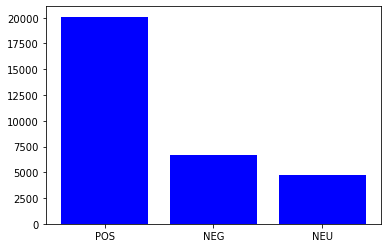

In [13]:
types = df.label.value_counts()
print('Class 0:', types[0],'is POS')
print('Class 1:', types[1],'is NEG')
print('Class 2:', types[2],'is NEU')
import matplotlib.pyplot as plt
plt.bar(counter.keys(),counter.values(),color='blue')


In [14]:
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
print(tokenizer)

# BINARY

In [15]:
X = tokenizer.texts_to_matrix(sentences,mode='binary')
print(X)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


# COUNT

In [16]:
X_count = tokenizer.texts_to_matrix(sentences,mode='count')
print(X_count)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 2. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]]


# TFIDF

In [17]:
X_tfidf = tokenizer.texts_to_matrix(sentences,mode='tfidf')
print(X_tfidf)

[[0.         0.9303152  0.         ... 0.         0.         0.        ]
 [0.         0.9303152  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         1.57516056 1.33308366 ... 0.         0.         0.        ]
 [0.         0.9303152  0.         ... 0.         0.         0.        ]
 [0.         1.57516056 0.         ... 0.         0.         0.        ]]


# LẤY TẬP TRAIN TEST VỚI MODE BINARY

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=0)

# LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report
model_LR = LogisticRegression(max_iter=1000)
model_LR = model_LR.fit(X_train,y_train)
y_pred = model_LR.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         NEG       0.70      0.75      0.73      1958
         NEU       0.42      0.22      0.29      1418
         POS       0.86      0.93      0.89      6062

    accuracy                           0.79      9438
   macro avg       0.66      0.64      0.64      9438
weighted avg       0.76      0.79      0.77      9438



# MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB   
model_NB = MultinomialNB()
model_NB = model_NB.fit(X_train,y_train)
y_pred = model_NB.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         NEG       0.65      0.75      0.69      1958
         NEU       0.34      0.29      0.31      1418
         POS       0.87      0.86      0.87      6062

    accuracy                           0.75      9438
   macro avg       0.62      0.63      0.62      9438
weighted avg       0.75      0.75      0.75      9438



# GaussianNB

In [21]:
from sklearn.naive_bayes import GaussianNB
# Train mô hình Naive bayes
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_gnb=gnb.predict(X_test)
print(y_gnb[0:5])
print(classification_report(y_test,y_gnb))

['NEU' 'NEU' 'NEU' 'NEU' 'NEU']
              precision    recall  f1-score   support

         NEG       0.45      0.16      0.24      1958
         NEU       0.15      0.87      0.26      1418
         POS       0.70      0.06      0.12      6062

    accuracy                           0.21      9438
   macro avg       0.43      0.37      0.20      9438
weighted avg       0.57      0.21      0.16      9438



# Neural_Network

In [22]:
from sklearn.neural_network import MLPClassifier
model_NN = MLPClassifier(hidden_layer_sizes=(10, 10, 20), max_iter=100,activation = 'relu')
model_NN.fit(X_train,y_train)
y_pred= model_NN.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         NEG       0.66      0.61      0.63      1958
         NEU       0.31      0.30      0.31      1418
         POS       0.85      0.88      0.86      6062

    accuracy                           0.74      9438
   macro avg       0.61      0.60      0.60      9438
weighted avg       0.73      0.74      0.73      9438



/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
# from keras.models import Sequential
# from keras.layers import Dense
# model = Sequential()
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=20, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train,y_train)

# accuracy = model.evaluate(X_train, y_train)
# print('Accuracy: %.2f' % (accuracy*100))

# Dự đoán sentiment với mode BINARY và model MultinomialNB

In [24]:
input_sen = 'tất sờn hết ca chưa dùng mà vay r'
tokens = nltk.word_tokenize(input_sen)
print(tokens)

['tất', 'sờn', 'hết', 'ca', 'chưa', 'dùng', 'mà', 'vay', 'r']


In [25]:
X_input = tokenizer.texts_to_matrix([tokens],mode='binary')
print(X_input)

[[0. 0. 0. ... 0. 0. 0.]]


In [26]:
y_pred = model_NB.predict(X_input)
print(y_pred)

['NEG']


# GIẢM DỮ LIỆU CÒN 5000 ĐỂ TRAIN VỚI MODEL SVM

In [27]:
labels = df.values[0:5000,2]
reviews = df.values[0:5000,1]
print(reviews[:5])
print(labels[:5])

['áo bao đẹp ạ positive' 'tuyệt vời positive' '2day ao không giong trong'
 'mùi thơm bôi lên da mềm da nagative positive' 'vải đẹp dày dặn positive']
['POS' 'POS' 'NEG' 'POS' 'POS']


In [28]:
sentences = [nltk.word_tokenize(sent) for sent in reviews]
print(sentences[0:5])

[['áo', 'bao', 'đẹp', 'ạ', 'positive'], ['tuyệt', 'vời', 'positive'], ['2day', 'ao', 'không', 'giong', 'trong'], ['mùi', 'thơm', 'bôi', 'lên', 'da', 'mềm', 'da', 'nagative', 'positive'], ['vải', 'đẹp', 'dày', 'dặn', 'positive']]


In [29]:
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
print(tokenizer)

In [30]:
X = tokenizer.texts_to_matrix(sentences,mode='binary')
print(X)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=0)

In [32]:
from sklearn.svm import SVC
# Train mô hình SVM
svm=SVC(C=2, kernel='rbf',gamma='scale')
svm.fit(X_train, y_train)
y_svm=svm.predict(X_test)
print(y_svm[0:10])
print(classification_report(y_test,y_svm))

['NEG' 'NEG' 'POS' 'POS' 'POS' 'NEG' 'POS' 'POS' 'NEU' 'POS']
              precision    recall  f1-score   support

         NEG       0.65      0.63      0.64       287
         NEU       0.45      0.32      0.37       295
         POS       0.84      0.93      0.88       918

    accuracy                           0.75      1500
   macro avg       0.65      0.63      0.63      1500
weighted avg       0.73      0.75      0.74      1500



In [33]:
input_sen = 'áo bao đẹp ạ positive'
tokens = nltk.word_tokenize(input_sen)
print(tokens)

['áo', 'bao', 'đẹp', 'ạ', 'positive']


In [34]:
X_input = tokenizer.texts_to_matrix([tokens],mode='binary')
print(X_input)

[[0. 1. 0. ... 0. 0. 0.]]


In [35]:
y_pred = svm.predict(X_input)
print(y_pred)

['POS']
